In [1]:
import requests
from bs4 import BeautifulSoup
import re
import numpy as np
import pandas as pd
from pprint import pprint
from time import sleep

In [70]:
# Read in the cleaned earthquake data
df = pd.read_csv('./clean_quakes.csv')
df.shape

(114498, 32)

In [71]:
df.head()

,id,lat,long,depth,alert,cdi,code,detail,dmin,felt,...,time,title,tsunami,type,types,tz,updated,url,magDecade,year
0,nc1022389,-121.873500,36.593000,4.946,0.0,NaN,1022389,https://earthquake.usgs.gov/fdsnws/event/1/que...,0.03694,NaN,...,1974-12-30 13:28:16.830,M 3.4 - Central California,False,earthquake,"focal-mechanism,nearby-cities,origin,phase-data",NaN,2016-12-14 18:02:44.940,https://earthquake.usgs.gov/earthquakes/eventp...,3,1974
1,nc1022388,-121.464500,36.929000,3.946,0.0,NaN,1022388,https://earthquake.usgs.gov/fdsnws/event/1/que...,0.04144,NaN,...,1974-12-30 09:46:54.820,M 3.0 - Central California,False,earthquake,"nearby-cities,origin,phase-data",NaN,2016-12-14 18:02:33.974,https://earthquake.usgs.gov/earthquakes/eventp...,2,1974
2,ci3319041,-116.128833,29.907667,6.000,0.0,NaN,3319041,https://earthquake.usgs.gov/fdsnws/event/1/que...,2.73400,NaN,...,1974-12-30 08:12:47.870,"M 4.6 - 206km SSE of Maneadero, B.C., MX",False,earthquake,"origin,phase-data",NaN,2016-01-28 20:48:03.640,https://earthquake.usgs.gov/earthquakes/eventp...,4,1974
3,usp00009ad,-116.402000,30.424000,33.000,0.0,NaN,p00009ad,https://earthquake.usgs.gov/fdsnws/event/1/que...,NaN,NaN,...,1974-12-30 08:12:15.300,"M 4.0 - offshore Baja California, Mexico",False,earthquake,origin,NaN,2014-11-06 18:21:28.071,https://earthquake.usgs.gov/earthquakes/eventp...,4,1974
4,usp000099y,-116.185000,30.757000,33.000,0.0,NaN,p000099y,https://earthquake.usgs.gov/fdsnws/event/1/que...,NaN,NaN,...,1974-12-29 07:07:01.500,"M 4.2 - offshore Baja California, Mexico",False,earthquake,"origin,phase-data",NaN,2016-01-28 20:18:24.990,https://earthquake.usgs.gov/earthquakes/eventp...,4,1974


In [72]:
# Oops, the latitude and longitude are swapped, need to fix the column headers to match data.

df.rename(columns={'lat': 'newlong', \
                        'long': 'newlat'}, inplace=True)

In [73]:
df.rename(columns={'newlong': 'long', \
                        'newlat': 'lat'}, inplace=True)

In [74]:
# Now the lat long issue has been corrected
df.head()

,id,long,lat,depth,alert,cdi,code,detail,dmin,felt,...,time,title,tsunami,type,types,tz,updated,url,magDecade,year
0,nc1022389,-121.873500,36.593000,4.946,0.0,NaN,1022389,https://earthquake.usgs.gov/fdsnws/event/1/que...,0.03694,NaN,...,1974-12-30 13:28:16.830,M 3.4 - Central California,False,earthquake,"focal-mechanism,nearby-cities,origin,phase-data",NaN,2016-12-14 18:02:44.940,https://earthquake.usgs.gov/earthquakes/eventp...,3,1974
1,nc1022388,-121.464500,36.929000,3.946,0.0,NaN,1022388,https://earthquake.usgs.gov/fdsnws/event/1/que...,0.04144,NaN,...,1974-12-30 09:46:54.820,M 3.0 - Central California,False,earthquake,"nearby-cities,origin,phase-data",NaN,2016-12-14 18:02:33.974,https://earthquake.usgs.gov/earthquakes/eventp...,2,1974
2,ci3319041,-116.128833,29.907667,6.000,0.0,NaN,3319041,https://earthquake.usgs.gov/fdsnws/event/1/que...,2.73400,NaN,...,1974-12-30 08:12:47.870,"M 4.6 - 206km SSE of Maneadero, B.C., MX",False,earthquake,"origin,phase-data",NaN,2016-01-28 20:48:03.640,https://earthquake.usgs.gov/earthquakes/eventp...,4,1974
3,usp00009ad,-116.402000,30.424000,33.000,0.0,NaN,p00009ad,https://earthquake.usgs.gov/fdsnws/event/1/que...,NaN,NaN,...,1974-12-30 08:12:15.300,"M 4.0 - offshore Baja California, Mexico",False,earthquake,origin,NaN,2014-11-06 18:21:28.071,https://earthquake.usgs.gov/earthquakes/eventp...,4,1974
4,usp000099y,-116.185000,30.757000,33.000,0.0,NaN,p000099y,https://earthquake.usgs.gov/fdsnws/event/1/que...,NaN,NaN,...,1974-12-29 07:07:01.500,"M 4.2 - offshore Baja California, Mexico",False,earthquake,"origin,phase-data",NaN,2016-01-28 20:18:24.990,https://earthquake.usgs.gov/earthquakes/eventp...,4,1974


In [78]:
df[['mag', 'magType', 'mmi']].head()

,mag,magType,mmi
0,3.39,md,NaN
1,2.99,md,NaN
2,4.58,ml,NaN
3,4.00,mb,NaN
4,4.20,mb,NaN


In [141]:
# Create a list of ids for earthquakes having 5 or more DYFI records
cdi_ids = list(df[df['cdi'].notnull() & (df['felt'] >= 5)]['id'])
len(cdi_ids)

7289

In [142]:
# Break the list of ids into groups of 1000 in order to make reasonable requests to the Comcat API.
cdi_list = []
stop_idx = len(cdi_ids)
for i in range(8):
    sub_list = []
    for j in range(1000):
        idx = i*1000 + j
        if idx < stop_idx:
            sub_list.append(cdi_ids[idx])
    cdi_list.append(sub_list)        
    

In [143]:
for idx in range(8):
    print len(cdi_list[idx])

1000
1000
1000
1000
1000
1000
1000
289


In [ ]:
# Create the urls needed to pull the dyfi detailed records
# Loop and retrieve dyfi details, adding the earthquake ID and saving the results in a dataframe 

# Initialize dataframe to hold all zip code aggregated dyfi responses
# Run this only before the initial set of detailed requests.  
# df_dyfi = pd.DataFrame()
# dyfi_not_pulled = []

In [ ]:
DO_NOT_EXECUTE = True

if not DO_NOT_EXECUTE: 
    count = 0
    for quake_id in cdi_list[0][500:1000]:
        sleep(1)

        # Get the url to access detailed earthquake event page
        try:
            cdi_url = "https://earthquake.usgs.gov/earthquakes/eventpage/-----#dyfi".replace('-----', quake_id)
            r = requests.get(cdi_url)
            html = r.text

            # Use Beautiful soup to extract the url needed to access detailed DYFI response data
            soup = BeautifulSoup(html, "lxml")
            cdi_detail = "https://earthquake.usgs.gov" + \
                    str(soup.find_all(href=re.compile("cdi_zip.txt"))).split()[1][6:-1]

            # Retrieve the DYFI detail info and add to dataframe    
            df_quake_dyfi = pd.read_csv(cdi_detail)
            df_quake_dyfi['id'] = quake_id
            df_dyfi = df_dyfi.append(df_quake_dyfi, ignore_index=True)
            print count, r, quake_id, " has been added to dataframe"

        except:
            print count, "Could not retrieve infor for ", quake_id
            dyfi_not_pulled.append(quake_id)

        count += 1        

In [ ]:
r

In [ ]:
# The only quake ID not able to be retrieved was us10006k0k
# dyfi_not_pulled

In [123]:
len(df_dyfi)

273499

In [ ]:
# df_dyfi_save = df_dyfi.copy()   # all

# df_dyfi.to_csv("./dyfi0.csv", index=False)  # all

In [ ]:
df_dyfi.tail()

In [ ]:
# This code was used to find the position of a quake id in the list of ids
# so the job could be restarted from the first id not yet pulled. 
for i in range(len(cdi_list[1])):
    if cdi_list[1][i] == 'nc72545730':
        print i

## Clean and augment the collected DYFI data

In [82]:
import numpy as np
import pandas as pd

df_dyfi = pd.read_csv("./dyfi0.csv")

In [83]:
df_dyfi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 273499 entries, 0 to 273498
Data columns (total 12 columns):
# Columns: ZIP/Location    273499 non-null object
CDI                        273499 non-null float64
City                       273499 non-null object
Epicentral distance        177545 non-null float64
Hypocentral distance       95954 non-null float64
Latitude                   273499 non-null float64
Location ID                18398 non-null object
Longitude                  273499 non-null float64
No. of responses           273499 non-null int64
State                      270854 non-null object
Suspect?                   273499 non-null int64
id                         273499 non-null object
dtypes: float64(5), int64(2), object(5)
memory usage: 25.0+ MB


In [84]:
# the Location ID column seems mostly useless to us, especially as most samples are missing the value
pd.DataFrame(df_dyfi['Location ID'].value_counts(dropna=False)).head()

,Location ID
NaN,255101
zip_2008:::73034,163
zip_2008:::74023,110
zip_2008:::73013,109
zip_2008:::74074,101


In [85]:
# Looks like a retired or otherwise mostly unused column, anc contains only zip code which
# is also in another column - so we can drop this one. 

df_dyfi[df_dyfi['Location ID'].notnull()][['Location ID', '# Columns: ZIP/Location']].head()

,Location ID,# Columns: ZIP/Location
12749,zip_2008:::38965,38965
12750,zip_2008:::46158,46158
12751,zip_2008:::47725,47725
12752,zip_2008:::52627,52627
12753,zip_2008:::71909,71909


In [86]:
df_dyfi = df_dyfi.drop(['Location ID'], 1)

In [87]:
# Records seem to contain either a hypocentral distance or epicentral distance, but not both
# The hypocenter of an earthquake is the location beneath the earth’s surface where the 
# rupture of the fault begins. The epicenter of an earthquake is the location directly
# above the hypocenter on the surface of the earth.

print len(df_dyfi[df_dyfi['Epicentral distance'].isnull()]['Hypocentral distance'].notnull())
print len(df_dyfi[df_dyfi['Hypocentral distance'].isnull()]['Epicentral distance'].notnull())
print 177545 + 95954

95954
177545
273499


In [88]:
# Create a distance column having either the hypocentral or epicentral distance, whichever is present
df_dyfi['distance'] = df_dyfi['Epicentral distance']
df_dyfi['distance'] = df_dyfi['distance'].fillna(df_dyfi['Hypocentral distance'])

In [89]:
# Create column to indicate whether the distance measurement is Epicentral(on surface) 
# or Hypocentral (subsurface at quake origin)

df_dyfi['is_epi_dist'] = df_dyfi['Epicentral distance'].map(lambda x: 0 if np.isnan(x) else 1)

In [90]:
# Check it out - did we get what we wanted? 
df_dyfi.loc[3042:3045]

,# Columns: ZIP/Location,CDI,City,Epicentral distance,Hypocentral distance,Latitude,Longitude,No. of responses,State,Suspect?,id,distance,is_epi_dist
3042,61820,2.2,Champaign,924.0,NaN,40.1110,-88.2437,1,IL,0,se609215,924.0,1
3043,62948,2.0,Herrin,974.0,NaN,37.8172,-89.0239,1,IL,0,se609215,974.0,1
3044,73020,3.2,Choctaw,NaN,9.0,35.4561,-97.2633,8,OK,0,usp000j6xn,9.0,0
3045,73049,2.2,Jones,NaN,5.0,35.5848,-97.2956,1,OK,0,usp000j6xn,5.0,0


In [91]:
# Drop the Epi & Hypocentral distance columns
df_dyfi = df_dyfi.drop(['Epicentral distance', 'Hypocentral distance'], 1)

In [92]:
# Clean up column names, indicating clearly that lat and long in dyfi are the observation point lat long,
# rather than the quake origin lat and long. 

df_dyfi.rename(columns={'Latitude': 'cdi_Latitude', \
                        'Longitude': 'cdi_Longitude', \
                        '# Columns: ZIP/Location' : 'zip_code', \
                        'CDI': 'cdi', \
                        'City': 'city', \
                        'No. of responses': 'responses', \
                        'State': 'state', \
                        'Suspect?': 'is_suspect'}, inplace=True)

In [93]:
df_dyfi.head()

,zip_code,cdi,city,cdi_Latitude,cdi_Longitude,responses,state,is_suspect,id,distance,is_epi_dist
0,15106,3.1,Carnegie,40.4084,-80.1105,1,PA,0,usp000j7ae,149.0,1
1,15478,2.5,Smithfield,39.7874,-79.8074,1,PA,0,usp000j7ae,132.0,1
2,17046,2.0,Lebanon,40.3849,-76.4271,1,PA,0,usp000j7ae,428.0,1
3,17543,2.2,Lititz,40.1759,-76.2938,1,PA,0,usp000j7ae,434.0,1
4,19934,3.4,Camden Wyoming,39.0850,-75.6238,3,DE,0,usp000j7ae,488.0,1


In [94]:
# arrange the columns in a more logical order
df_dyfi = df_dyfi[['id', 'cdi_Latitude', 'cdi_Longitude', 'city', 'state', 'zip_code', 'is_suspect', 'responses',\
                  'is_epi_dist', 'distance', 'cdi']]

In [95]:
df_dyfi.head()

,id,cdi_Latitude,cdi_Longitude,city,state,zip_code,is_suspect,responses,is_epi_dist,distance,cdi
0,usp000j7ae,40.4084,-80.1105,Carnegie,PA,15106,0,1,1,149.0,3.1
1,usp000j7ae,39.7874,-79.8074,Smithfield,PA,15478,0,1,1,132.0,2.5
2,usp000j7ae,40.3849,-76.4271,Lebanon,PA,17046,0,1,1,428.0,2.0
3,usp000j7ae,40.1759,-76.2938,Lititz,PA,17543,0,1,1,434.0,2.2
4,usp000j7ae,39.0850,-75.6238,Camden Wyoming,DE,19934,0,3,1,488.0,3.4


In [96]:
df_dyfi.loc[:,'mmi'] = np.nan
df_dyfi.loc[:,'mag'] = np.nan
df_dyfi.loc[:,'mag_type'] = np.nan
df_dyfi.loc[:,'depth'] = np.nan
df_dyfi.loc[:,'q_lat'] = np.nan
df_dyfi.loc[:,'q_long'] = np.nan
df_dyfi.loc[:,'q_time'] = np.nan

In [97]:
df_dyfi.head()

,id,cdi_Latitude,cdi_Longitude,city,state,zip_code,is_suspect,responses,is_epi_dist,distance,cdi,mmi,mag,mag_type,depth,q_lat,q_long,q_time
0,usp000j7ae,40.4084,-80.1105,Carnegie,PA,15106,0,1,1,149.0,3.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,usp000j7ae,39.7874,-79.8074,Smithfield,PA,15478,0,1,1,132.0,2.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,usp000j7ae,40.3849,-76.4271,Lebanon,PA,17046,0,1,1,428.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,usp000j7ae,40.1759,-76.2938,Lititz,PA,17543,0,1,1,434.0,2.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,usp000j7ae,39.0850,-75.6238,Camden Wyoming,DE,19934,0,3,1,488.0,3.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [100]:
# Update the dyfi observation reports with the factors from the earthquake event data needed for future modeling.
# These factors are magnitude, depth, lat, long and time

current_quake_id = 'start'
next_quake_id = df_dyfi.iloc[0]['id']
idx = 0
length = len(df_dyfi)
while idx < length:
    
    if idx % 1000 == 0:
        print "Processing records", idx, " to", idx+1000, ".  Current quake id is", current_quake_id
    
    # Get quake id for next set of dyfi records
    if next_quake_id != current_quake_id:
        current_quake_id = next_quake_id
    
        # Pull the magnitude, depth, lat, long and time from the earthquake event records
        current_quake_mmi = df[df['id'] == current_quake_id]['mmi'].item()
        current_quake_mag = df[df['id'] == current_quake_id]['mag'].item()
        current_quake_mag_type = df[df['id'] == current_quake_id]['magType'].item()
        current_quake_depth = df[df['id'] == current_quake_id]['depth'].item()
        current_quake_lat = df[df['id'] == current_quake_id]['lat'].item()
        current_quake_long = df[df['id'] == current_quake_id]['long'].item()
        current_quake_time = df[df['id'] == current_quake_id]['time'].item()
    
    
    # Update each dyfi record sharing same quake id with the quake magnitude, depth, lat, long and time
    df_dyfi.loc[idx, 'mmi'] = current_quake_mmi
    df_dyfi.loc[idx, 'mag'] = current_quake_mag
    df_dyfi.loc[idx, 'mag_type'] = current_quake_mag_type
    df_dyfi.loc[idx, 'depth'] = current_quake_depth
    df_dyfi.loc[idx, 'q_lat'] = current_quake_lat
    df_dyfi.loc[idx, 'q_long'] = current_quake_long
    df_dyfi.loc[idx, 'q_time'] = current_quake_time
        
    # Step through all dyfi records with same quake id
    idx += 1
    if idx < length:
        next_quake_id = df_dyfi.iloc[idx]['id']

print "Finished updating mmi, mag, mag_type, depth, q_lat, q_long, time"        

Processing records 0  to 1000 .  Current quake id is start
Processing records 1000  to 2000 .  Current quake id is se609216
Processing records 2000  to 3000 .  Current quake id is se609215
Processing records 3000  to 4000 .  Current quake id is se609215
Processing records 4000  to 5000 .  Current quake id is se609212
Processing records 5000  to 6000 .  Current quake id is se609212
Processing records 6000  to 7000 .  Current quake id is se609212
Processing records 7000  to 8000 .  Current quake id is se609212
Processing records 8000  to 9000 .  Current quake id is se609212
Processing records 9000  to 10000 .  Current quake id is se609212
Processing records 10000  to 11000 .  Current quake id is se609212
Processing records 11000  to 12000 .  Current quake id is se609212
Processing records 12000  to 13000 .  Current quake id is usp000j527
Processing records 13000  to 14000 .  Current quake id is se609184
Processing records 14000  to 15000 .  Current quake id is nm608511
Processing records

Processing records 120000  to 121000 .  Current quake id is nm605742
Processing records 121000  to 122000 .  Current quake id is se605646
Processing records 122000  to 123000 .  Current quake id is usp000cz1k
Processing records 123000  to 124000 .  Current quake id is se605386
Processing records 124000  to 125000 .  Current quake id is se605353
Processing records 125000  to 126000 .  Current quake id is se605341
Processing records 126000  to 127000 .  Current quake id is nm605053
Processing records 127000  to 128000 .  Current quake id is nm605053
Processing records 128000  to 129000 .  Current quake id is ld2002042000
Processing records 129000  to 130000 .  Current quake id is ld2002042000
Processing records 130000  to 131000 .  Current quake id is ci15354537
Processing records 131000  to 132000 .  Current quake id is nc71996906
Processing records 132000  to 133000 .  Current quake id is ci15333497
Processing records 133000  to 134000 .  Current quake id is ci15296281
Processing recor

Processing records 236000  to 237000 .  Current quake id is ci14429152
Processing records 237000  to 238000 .  Current quake id is ci10372885
Processing records 238000  to 239000 .  Current quake id is ci10370141
Processing records 239000  to 240000 .  Current quake id is ci14408052
Processing records 240000  to 241000 .  Current quake id is ci14402980
Processing records 241000  to 242000 .  Current quake id is ci14384052
Processing records 242000  to 243000 .  Current quake id is ci14376612
Processing records 243000  to 244000 .  Current quake id is ci10321561
Processing records 244000  to 245000 .  Current quake id is nn00234425
Processing records 245000  to 246000 .  Current quake id is nc40210720
Processing records 246000  to 247000 .  Current quake id is nc40204628
Processing records 247000  to 248000 .  Current quake id is ci14325560
Processing records 248000  to 249000 .  Current quake id is ci10276197
Processing records 249000  to 250000 .  Current quake id is ci14313828
Proces

In [102]:
df_dyfi.tail(10)

,id,cdi_Latitude,cdi_Longitude,city,state,zip_code,is_suspect,responses,is_epi_dist,distance,cdi,mmi,mag,mag_type,depth,q_lat,q_long,q_time
273489,ci14422624,33.9229,-117.2454,Moreno Valley,CA,92553,0,1,1,33.0,2.0,NaN,2.59,ml,17.2,34.094667,-117.481833,2009-02-18 22:29:03.740
273490,ci14422624,33.9719,-117.2589,Moreno Valley,CA,92557,0,2,1,29.0,2.0,NaN,2.59,ml,17.2,34.094667,-117.481833,2009-02-18 22:29:03.740
273491,ci14422624,33.7846,-117.3209,Perris,CA,92570,0,2,1,41.0,2.0,NaN,2.59,ml,17.2,34.094667,-117.481833,2009-02-18 22:29:03.740
273492,ci14422624,33.6461,-117.6857,Lake Forest,CA,92630,0,1,1,56.0,2.0,NaN,2.59,ml,17.2,34.094667,-117.481833,2009-02-18 22:29:03.740
273493,ci14422624,33.8793,-117.8964,Fullerton,CA,92831,0,1,1,49.0,2.0,NaN,2.59,ml,17.2,34.094667,-117.481833,2009-02-18 22:29:03.740
273494,ci14422624,33.8800,-117.9611,Fullerton,CA,92833,0,1,1,53.0,1.0,NaN,2.59,ml,17.2,34.094667,-117.481833,2009-02-18 22:29:03.740
273495,ci14422624,33.9247,-117.5527,Norco,CA,92860,0,1,1,26.0,2.0,NaN,2.59,ml,17.2,34.094667,-117.481833,2009-02-18 22:29:03.740
273496,ci14422624,33.8809,-117.8553,Placentia,CA,92870,0,1,1,46.0,1.0,NaN,2.59,ml,17.2,34.094667,-117.481833,2009-02-18 22:29:03.740
273497,ci14422624,33.9213,-117.6113,Corona,CA,92880,0,1,1,29.0,2.0,NaN,2.59,ml,17.2,34.094667,-117.481833,2009-02-18 22:29:03.740
273498,ci14422624,35.1543,-118.5042,Tehachapi,CA,93561,0,1,1,151.0,2.0,NaN,2.59,ml,17.2,34.094667,-117.481833,2009-02-18 22:29:03.740


In [105]:
len(df_dyfi[df_dyfi['mmi'].notnull()])

149235

In [172]:
df_dyfi.loc[0,'q_time'].split()[1].split(":")[0]

'05'

In [174]:
df_dyfi['q_hour'] = df_dyfi['q_time'].map(lambda x: x.split()[1].split(":")[0])

In [176]:
df_dyfi.head()

,ZIP Code,CDI,City,Epicentral distance,Hypocentral distance,cdi_Latitude,cdi_Longitude,No. of responses,State,Suspect?,id,distance,mag,depth,q_lat,q_long,q_time,q_hour
0,15106,3.1,Carnegie,149.0,NaN,40.4084,-80.1105,1,PA,0,usp000j7ae,149.0,2.8,5.0,39.4,-81.27,2011-08-31 05:35:12.410,05
1,15478,2.5,Smithfield,132.0,NaN,39.7874,-79.8074,1,PA,0,usp000j7ae,132.0,2.8,5.0,39.4,-81.27,2011-08-31 05:35:12.410,05
2,17046,2.0,Lebanon,428.0,NaN,40.3849,-76.4271,1,PA,0,usp000j7ae,428.0,2.8,5.0,39.4,-81.27,2011-08-31 05:35:12.410,05
3,17543,2.2,Lititz,434.0,NaN,40.1759,-76.2938,1,PA,0,usp000j7ae,434.0,2.8,5.0,39.4,-81.27,2011-08-31 05:35:12.410,05
4,19934,3.4,Camden Wyoming,488.0,NaN,39.0850,-75.6238,3,DE,0,usp000j7ae,488.0,2.8,5.0,39.4,-81.27,2011-08-31 05:35:12.410,05


In [106]:
df_dyfi.to_csv("./dyfi_mmi.csv", index=False)

##  Read back in and check some stuff

In [2]:
df_dyfi = pd.read_csv("./dyfi_mmi.csv")

In [3]:
df_dyfi.head()

,id,cdi_Latitude,cdi_Longitude,city,state,zip_code,is_suspect,responses,is_epi_dist,distance,cdi,mmi,mag,mag_type,depth,q_lat,q_long,q_time
0,usp000j7ae,40.4084,-80.1105,Carnegie,PA,15106,0,1,1,149.0,3.1,NaN,2.8,mblg,5.0,39.4,-81.27,2011-08-31 05:35:12.410
1,usp000j7ae,39.7874,-79.8074,Smithfield,PA,15478,0,1,1,132.0,2.5,NaN,2.8,mblg,5.0,39.4,-81.27,2011-08-31 05:35:12.410
2,usp000j7ae,40.3849,-76.4271,Lebanon,PA,17046,0,1,1,428.0,2.0,NaN,2.8,mblg,5.0,39.4,-81.27,2011-08-31 05:35:12.410
3,usp000j7ae,40.1759,-76.2938,Lititz,PA,17543,0,1,1,434.0,2.2,NaN,2.8,mblg,5.0,39.4,-81.27,2011-08-31 05:35:12.410
4,usp000j7ae,39.0850,-75.6238,Camden Wyoming,DE,19934,0,3,1,488.0,3.4,NaN,2.8,mblg,5.0,39.4,-81.27,2011-08-31 05:35:12.410


In [4]:
df_dyfi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 273499 entries, 0 to 273498
Data columns (total 18 columns):
id               273499 non-null object
cdi_Latitude     273499 non-null float64
cdi_Longitude    273499 non-null float64
city             273499 non-null object
state            270854 non-null object
zip_code         273499 non-null object
is_suspect       273499 non-null int64
responses        273499 non-null int64
is_epi_dist      273499 non-null int64
distance         273499 non-null float64
cdi              273499 non-null float64
mmi              149235 non-null float64
mag              273499 non-null float64
mag_type         273499 non-null object
depth            273499 non-null float64
q_lat            273499 non-null float64
q_long           273499 non-null float64
q_time           273499 non-null object
dtypes: float64(9), int64(3), object(6)
memory usage: 37.6+ MB


In [38]:
df_dyfi['id'].unique().size

7287

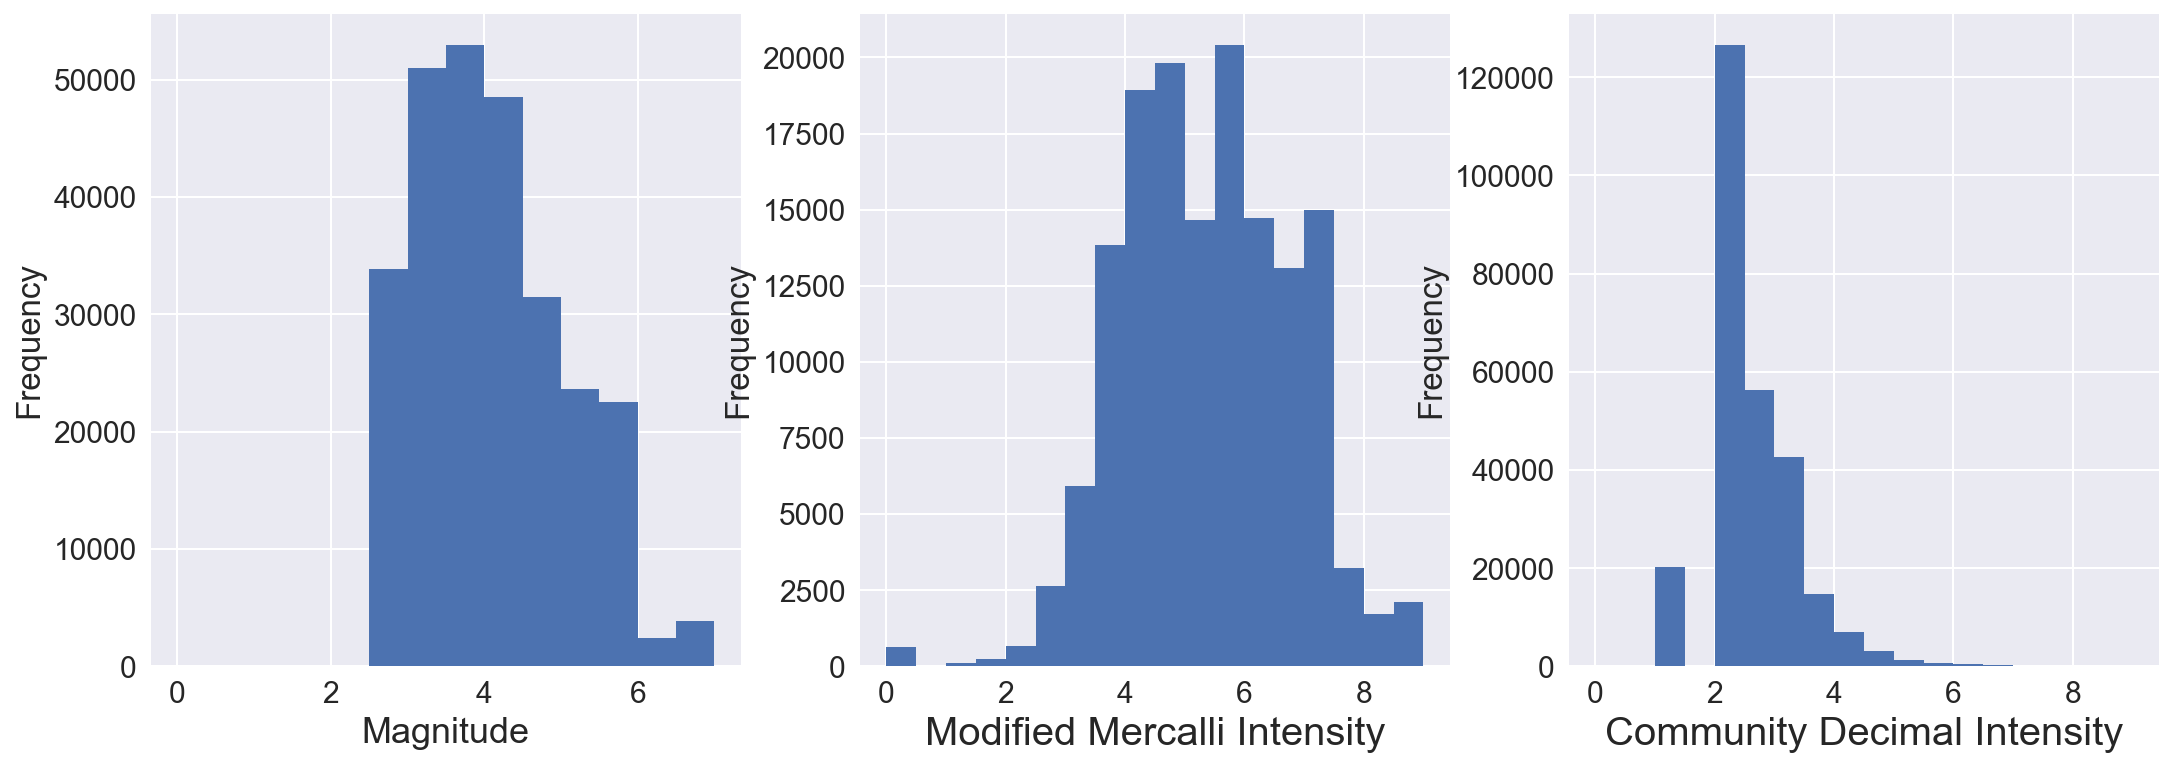

In [32]:
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# Seaborn is just a quick way to adjust font scale that seems to apply to matplotlib 
# graphs drawn after this is called
import seaborn as sns
sns.set(font_scale=1.5)

fig, axs = plt.subplots(ncols=3, figsize=(18,6))
df_dyfi['mag'].plot(kind='hist', bins=14, range=(0,7), ax=axs[0])
df_dyfi['mmi'].plot(kind='hist', bins=18, range=(0,9), ax=axs[1])
df_dyfi['cdi'].plot(kind='hist', bins=18, range=(0,9), ax=axs[2])
axs[0].set_xlabel('Magnitude', fontsize=18)
axs[1].set_xlabel('Modified Mercalli Intensity', fontsize=20)
axs[2].set_xlabel('Community Decimal Intensity', fontsize=20)
axs[0].locator_params(numticks=9)


### This doesn't make sense - distributions of CDI should not have so many values between 2 and 3

In [8]:
# Read in the cleaned earthquake data
df = pd.read_csv('./clean_quakes.csv')
df.shape

(114498, 32)

In [9]:
# Oops, the latitude and longitude are swapped, need to fix the column headers to match data.

df.rename(columns={'lat': 'newlong', \
                        'long': 'newlat'}, inplace=True)

In [10]:
df.rename(columns={'newlong': 'long', \
                        'newlat': 'lat'}, inplace=True)

In [11]:
# Now the lat long issue has been corrected
df.head()

,id,long,lat,depth,alert,cdi,code,detail,dmin,felt,...,time,title,tsunami,type,types,tz,updated,url,magDecade,year
0,nc1022389,-121.873500,36.593000,4.946,0.0,NaN,1022389,https://earthquake.usgs.gov/fdsnws/event/1/que...,0.03694,NaN,...,1974-12-30 13:28:16.830,M 3.4 - Central California,False,earthquake,"focal-mechanism,nearby-cities,origin,phase-data",NaN,2016-12-14 18:02:44.940,https://earthquake.usgs.gov/earthquakes/eventp...,3,1974
1,nc1022388,-121.464500,36.929000,3.946,0.0,NaN,1022388,https://earthquake.usgs.gov/fdsnws/event/1/que...,0.04144,NaN,...,1974-12-30 09:46:54.820,M 3.0 - Central California,False,earthquake,"nearby-cities,origin,phase-data",NaN,2016-12-14 18:02:33.974,https://earthquake.usgs.gov/earthquakes/eventp...,2,1974
2,ci3319041,-116.128833,29.907667,6.000,0.0,NaN,3319041,https://earthquake.usgs.gov/fdsnws/event/1/que...,2.73400,NaN,...,1974-12-30 08:12:47.870,"M 4.6 - 206km SSE of Maneadero, B.C., MX",False,earthquake,"origin,phase-data",NaN,2016-01-28 20:48:03.640,https://earthquake.usgs.gov/earthquakes/eventp...,4,1974
3,usp00009ad,-116.402000,30.424000,33.000,0.0,NaN,p00009ad,https://earthquake.usgs.gov/fdsnws/event/1/que...,NaN,NaN,...,1974-12-30 08:12:15.300,"M 4.0 - offshore Baja California, Mexico",False,earthquake,origin,NaN,2014-11-06 18:21:28.071,https://earthquake.usgs.gov/earthquakes/eventp...,4,1974
4,usp000099y,-116.185000,30.757000,33.000,0.0,NaN,p000099y,https://earthquake.usgs.gov/fdsnws/event/1/que...,NaN,NaN,...,1974-12-29 07:07:01.500,"M 4.2 - offshore Baja California, Mexico",False,earthquake,"origin,phase-data",NaN,2016-01-28 20:18:24.990,https://earthquake.usgs.gov/earthquakes/eventp...,4,1974


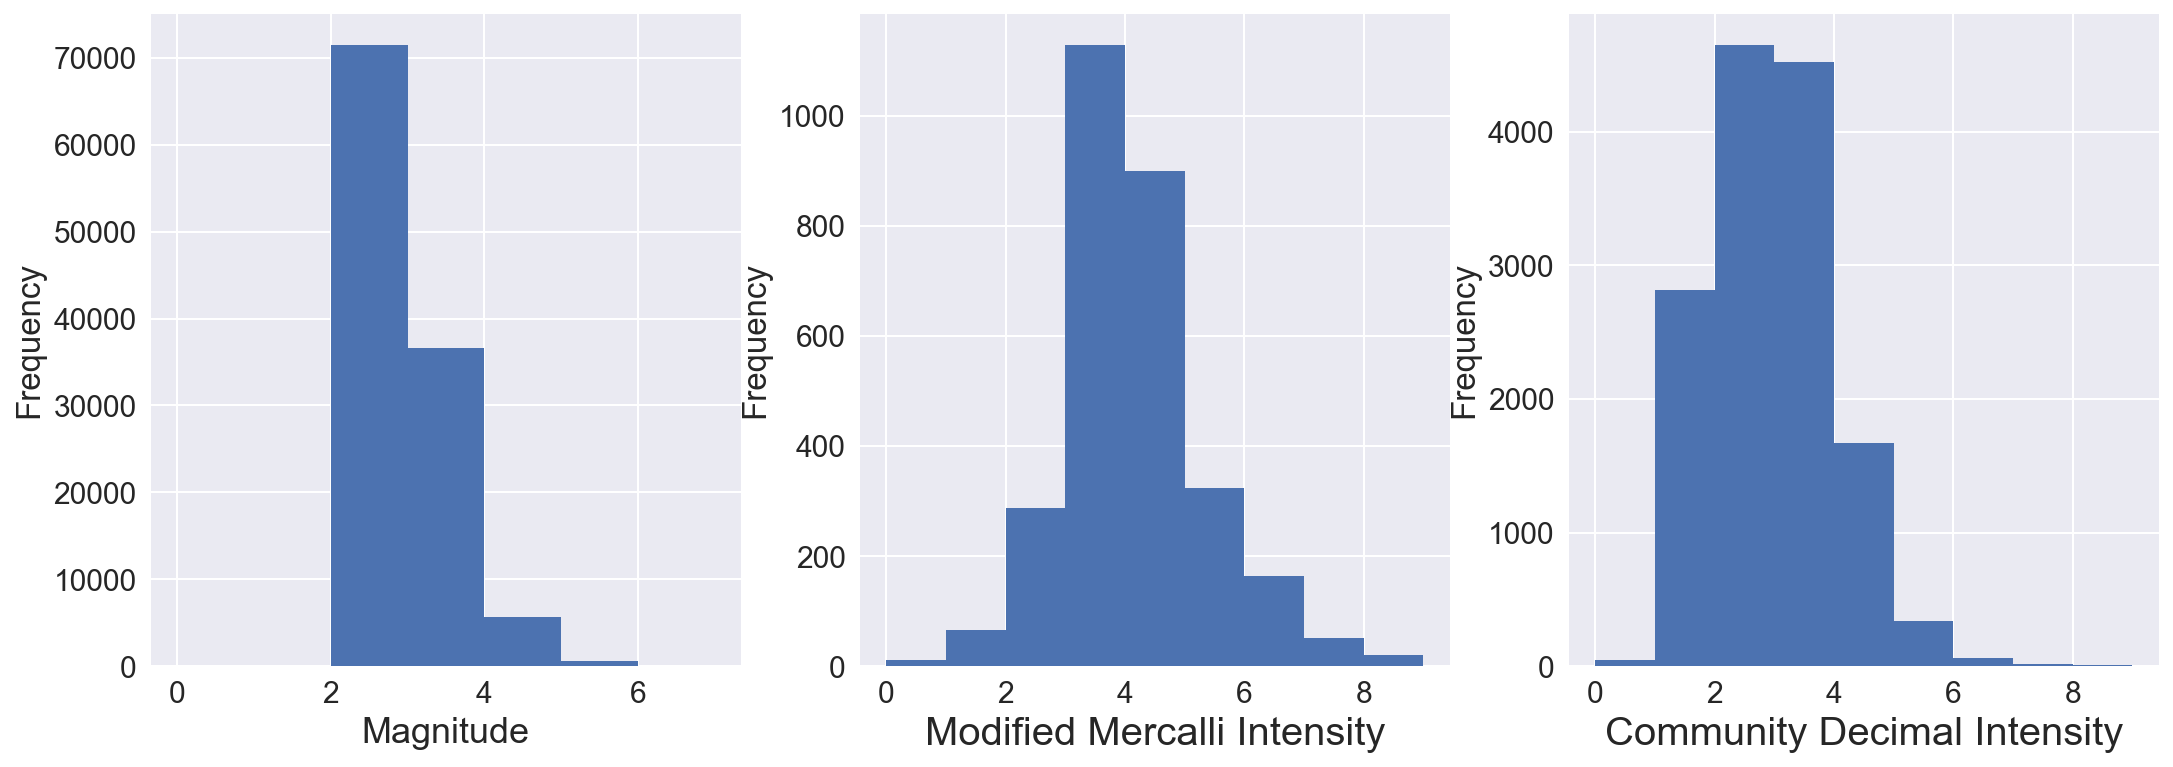

In [27]:
# Look at distributions in the quake catalog dataset

# Seaborn is just a quick way to adjust font scale that seems to apply to matplotlib 
# graphs drawn after this is called
import seaborn as sns
sns.set(font_scale=1.5)

# 
fig, axs = plt.subplots(ncols=3, figsize=(18,6))
df['mag'].plot(kind='hist', bins=7, range=(0,7), ax=axs[0])
df['mmi'].plot(kind='hist', bins=9, range=(0,9), ax=axs[1])
df['cdi'].plot(kind='hist', bins=9, range=(0,9), ax=axs[2])
axs[0].set_xlabel('Magnitude', fontsize=18)
axs[1].set_xlabel('Modified Mercalli Intensity', fontsize=20)
axs[2].set_xlabel('Community Decimal Intensity', fontsize=20)
axs[0].locator_params(numticks=9)


In [28]:
df[(df['felt']>=5) & (df['mmi'].notnull())].shape

(1690, 32)

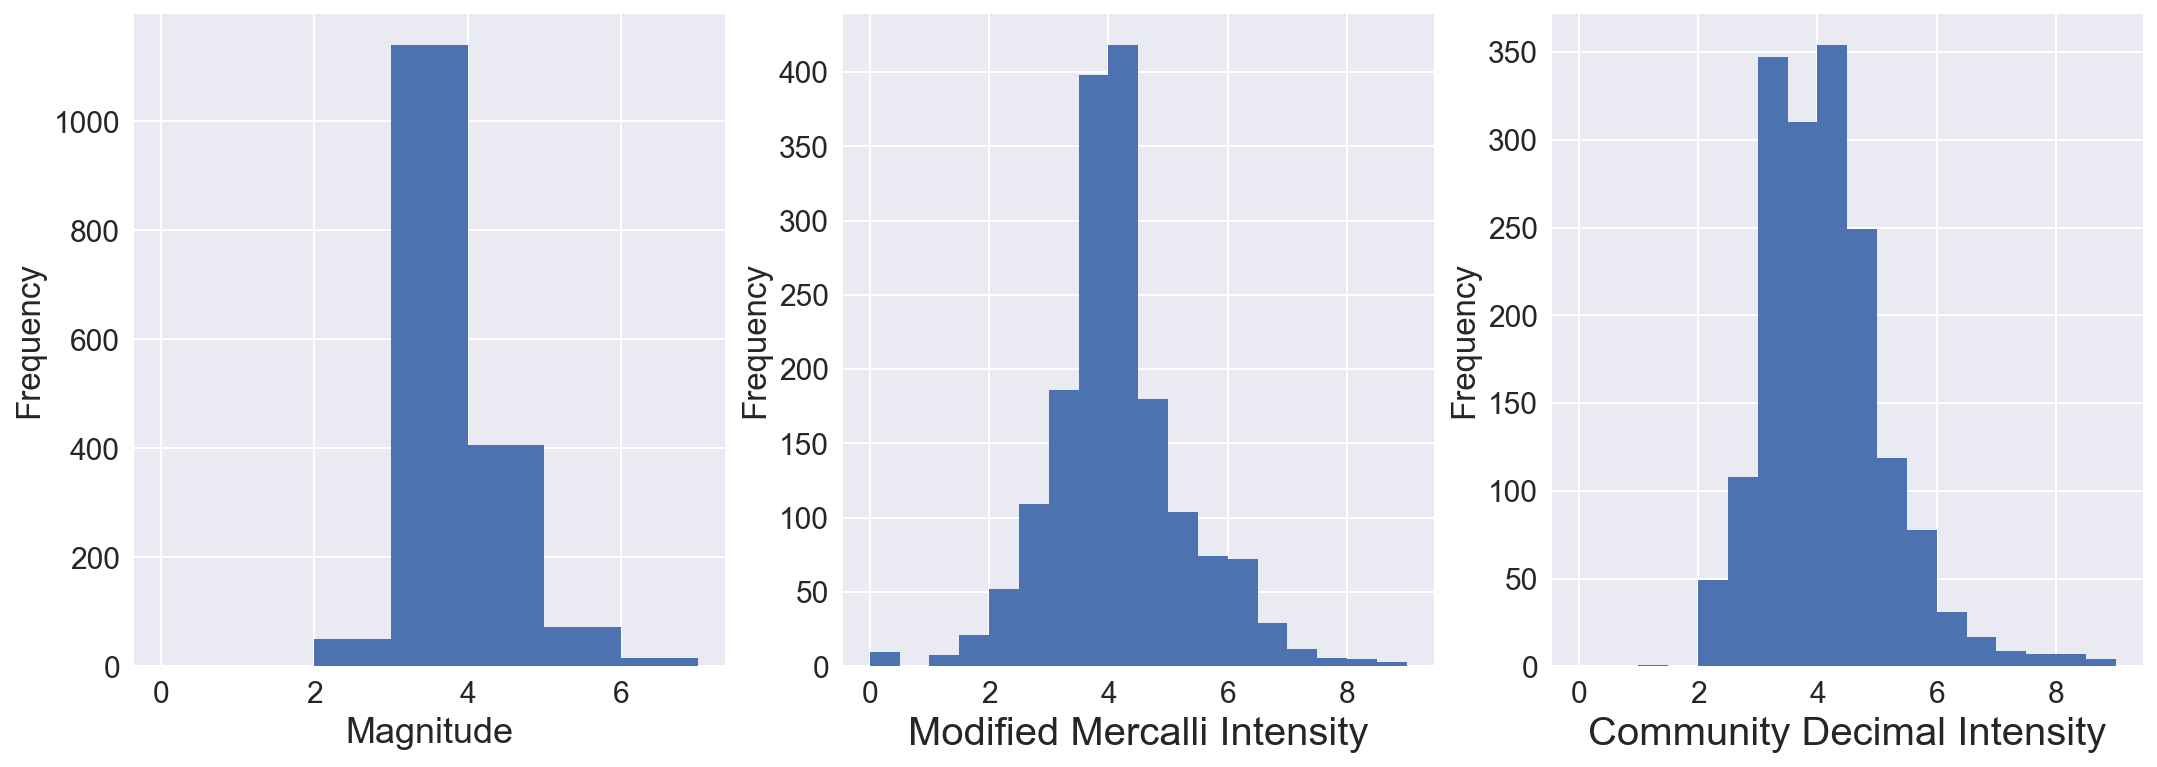

In [29]:

fig, axs = plt.subplots(ncols=3, figsize=(18,6))
df[(df['felt']>=5) & (df['mmi'].notnull())]['mag'].plot(kind='hist', bins=7, range=(0,7), ax=axs[0])
df[(df['felt']>=5) & (df['mmi'].notnull())]['mmi'].plot(kind='hist', bins=18, range=(0,9), ax=axs[1])
df[(df['felt']>=5) & (df['mmi'].notnull())]['cdi'].plot(kind='hist', bins=18, range=(0,9), ax=axs[2])
axs[0].set_xlabel('Magnitude', fontsize=18)
axs[1].set_xlabel('Modified Mercalli Intensity', fontsize=20)
axs[2].set_xlabel('Community Decimal Intensity', fontsize=20)
axs[0].locator_params(numticks=9)


In [14]:
df_dyfi.shape

(273499, 18)

In [43]:
df_dyfi['id'].unique().size

7287

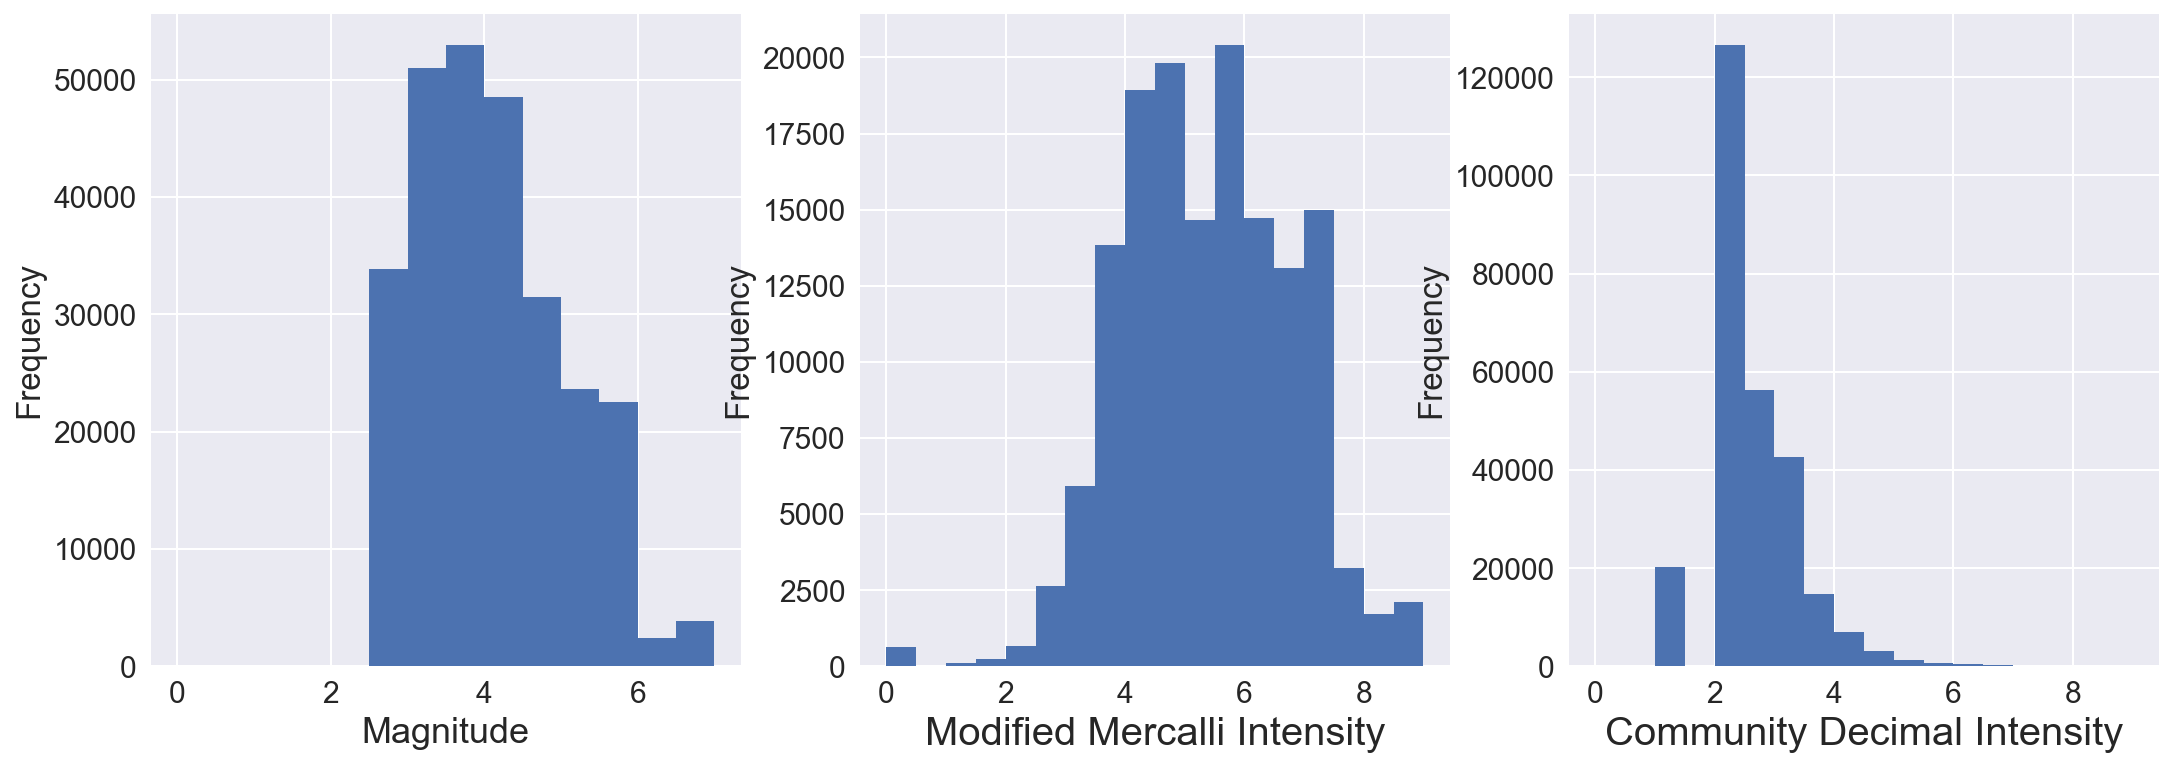

In [44]:
# Now look at distributions of quake catalog for only those quakes having CDI data

fig, axs = plt.subplots(ncols=3, figsize=(18,6))
df_dyfi['mag'].plot(kind='hist', bins=14, range=(0,7), ax=axs[0])
df_dyfi['mmi'].plot(kind='hist', bins=18, range=(0,9), ax=axs[1])
df_dyfi['cdi'].plot(kind='hist', bins=18, range=(0,9), ax=axs[2])
axs[0].set_xlabel('Magnitude', fontsize=18)
axs[1].set_xlabel('Modified Mercalli Intensity', fontsize=20)
axs[2].set_xlabel('Community Decimal Intensity', fontsize=20)
axs[0].locator_params(numticks=9)



In [40]:
df_dyfi[(df_dyfi['cdi'].notnull()) & (df_dyfi['mmi'].notnull())].shape

(149235, 18)

In [41]:
df_dyfi[(df_dyfi['cdi'].notnull()) & (df_dyfi['mmi'].notnull())]['id'].unique().size

1690

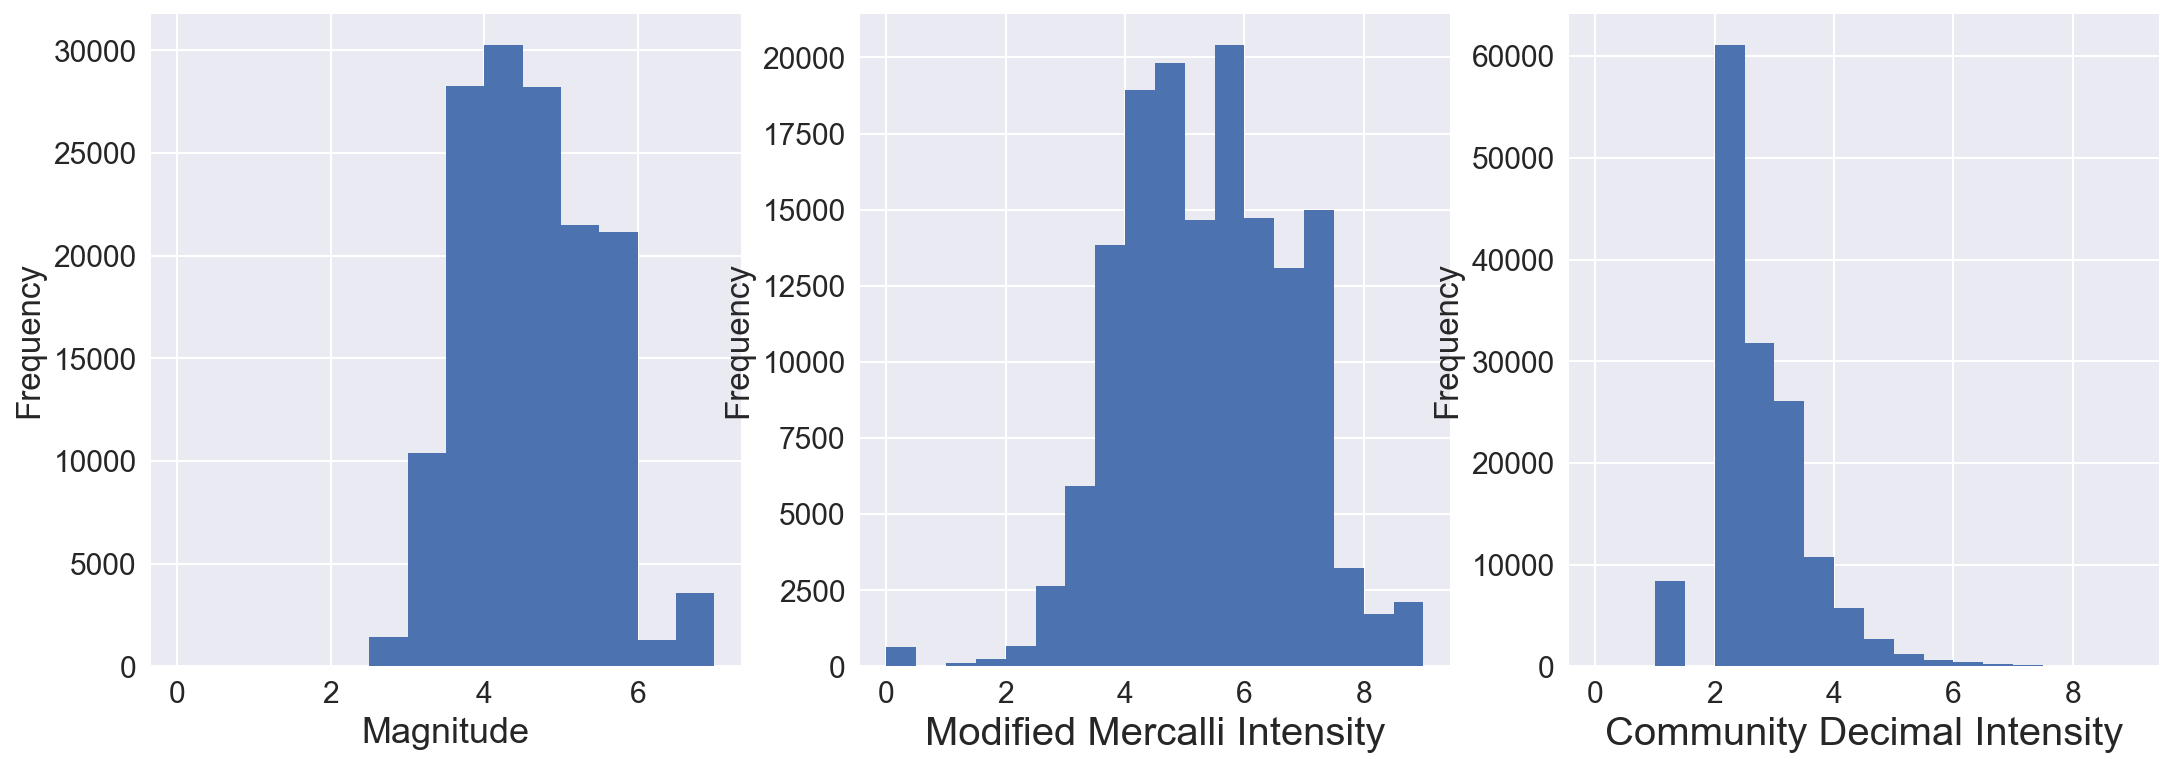

In [42]:
# Now look at distributions of quake catalog for only those quakes having CDI data

fig, axs = plt.subplots(ncols=3, figsize=(18,6))
df_dyfi[(df_dyfi['cdi'].notnull()) & (df_dyfi['mmi'].notnull())]['mag'].plot(kind='hist', bins=14, range=(0,7), ax=axs[0])
df_dyfi[(df_dyfi['cdi'].notnull()) & (df_dyfi['mmi'].notnull())]['mmi'].plot(kind='hist', bins=18, range=(0,9), ax=axs[1])
df_dyfi[(df_dyfi['cdi'].notnull()) & (df_dyfi['mmi'].notnull())]['cdi'].plot(kind='hist', bins=18, range=(0,9), ax=axs[2])
axs[0].set_xlabel('Magnitude', fontsize=18)
axs[1].set_xlabel('Modified Mercalli Intensity', fontsize=20)
axs[2].set_xlabel('Community Decimal Intensity', fontsize=20)
axs[0].locator_params(numticks=9)



In [ ]:
# copy the dyfi dataframe, and rename the columns from quake catalog to "prior"
dfcdi = dy_dyfi.copy